## Surveillance des performances

Dans ce chapitre, vous découvrirez le domaine important et pertinent des opérations d'apprentissage automatique (ML) et comment assurer un bon fonctionnement des systèmes de production développés jusqu'à présent dans ce guide en utilisant les meilleures pratiques dans le domaine et les modèles opérationnels connus. 

Nous comprendrons le concept des opérations dans ML et examinerons les métriques de surveillance de la qualité des données dans les systèmes ML. Plus précisément, nous examinerons les sections suivantes dans ce chapitre :

* Présentation de la surveillance des performances pour les modèles ML

* Surveillance des données et les performances du modèle
* Surveillance de la cible 

* Surveillance et alerte de l'infrastructure 

Nous aborderons quelques outils de référence pratiques pour la surveillance des performances et de la fiabilité des systèmes de ML

## Vue d'ensemble de la surveillance des performances pour les modèles d'apprentissage automatique 

La surveillance est la pierre angulaire des systèmes de ML fiables, capables de débloquer systématiquement la valeur des données et de fournir des commentaires critiques pour l'amélioration. Du côté de la surveillance des modèles de ML, il existe plusieurs parties intéressées, et nous devrions prendre le exigences de suivi des diérentes parties prenantes impliquées. 

Un exemple d'un ensemble typique de parties prenantes est le suivant :

* Scientifiques des données : leur objectif en matière de surveillance est d'évaluer les performances du modèle et la collecte des données qui pourraient avoir un impact négatif sur ces performances.

* Ingénieurs logiciels : ces parties prenantes veulent s'assurer qu'ils disposent de métriques qui évaluent si leurs produits ont un accès fiable et correct aux API qui servent des modèles.

* Ingénieurs de données : ils veulent s'assurer que les pipelines de données sont fiables et transmettent les données de manière fiable, à la bonne vitesse et conformément aux bons schémas

* Parties prenantes commerciales/produits : ces parties prenantes s'intéressent à l'impact fondamental de la solution globale sur leur clientèle. Par exemple, dans une plateforme de trading, ils pourraient être plus préoccupés par le rapport bénéfices/risques que la solution globale apporte à l'entreprise. Un disjoncteur peut être ajouté à l'algorithme si le marché est dans une journée de très forte volatilité ou dans une situation atypique


Les dimensions de surveillance les plus largement utilisées dans l'industrie du ML sont les suivantes :

* Drive de données : correspond à des changements significatifs dans les données d'entrée utilisées soit pour l'apprentissage, soit pour l'inférence dans un modèle. Cela peut indiquer un changement de la prémisse modélisée dans le monde réel, ce qui nécessitera que le modèle soit recyclé, réaménagé ou même archivé s'il ne convient plus. Cela peut être facilement détecté en surveillant les distributions des données utilisées pour l'apprentissage du modèle par rapport aux données utilisées pour la notation ou l'inférence au fil du temps.

* Drive cible : en ligne avec le changement de régime dans les données d'entrée, nous voyons souvent le même changement dans la distribution des résultats du modèle sur une période de temps. Les périodes courantes sont des mois, des semaines ou des jours et peuvent indiquer un changement important dans l'environnement qui nécessiterait un réaménagement et un ajustement du modèle

* Dégradation des performances : il s'agit de déterminer si les mesures de performances telles que la précision des problèmes de classification ou l'erreur quadratique moyenne commencent à s'aggraver progressivement au fil du temps. Ceci est une indication d'un problème avec le modèle nécessitant une enquête et une action de la part du développeur ou du mainteneur du modèle


* Métriques de plate-forme et d'infrastructure : Ce type de métrique n'est pas directement lié à la modélisation, mais à l'infrastructure des systèmes qui entoure le modèle. Cela implique une utilisation anormale du processeur, de la mémoire, du réseau ou du disque qui affectera certainement la capacité du modèle à apporter de la valeur à l'entreprise

* Métriques d'entreprise : des métriques d'entreprise très critiques, telles que la rentabilité des modèles, doivent dans certaines circonstances être ajoutées aux opérations du modèle afin de garantir que l'équipe responsable du modèle peut surveiller la capacité du modèle à atteindre ses objectifs. local commercial

Dans la section suivante, nous examinerons l'utilisation d'un outil que nous pouvons intégrer à MLflow pour surveiller la perte de données et vérifier les performances des modèles.

## Surveillance de la dérive des données et des performances du modèle 

Dans cette section, nous allons passer en revue un exemple que vous pouvez suivre dans le bloc-notes disponible dans le référentiel GitHub (à l'adresse https://github.com/PacktPublishing/Machine-Learning-Engineering-with-MLflow/ tree/master/Chapter11/model_performance_drifts) du code du package. Nous allons parcourir le processus de calcul de différents types de drive et explorer son intégration avec MLflow. 

Un outil open source émergent dans l'espace de surveillance des performances des modèles s'appelle Evidently (https://evidentlyai.com/). Evidemment nous aide à analyser les modèles de ML pendant les phases de production et de validation. Il génère des rapports pratiques intégrés aux pandas, JSON et CSV. Il nous permet de surveiller plusieurs drives dans les modèles ML et leurs performances. Le référentiel GitHub pour Evidently est disponible à l'adresse https://github.com/evidentlyai/evidently/. Dans cette section, nous explorerons la combinaison d'Evidently avec MLflow, afin de surveiller section suivante

## Surveillance de la dérive des données

Dans cette sous-section, nous allons installer Evidemment dans notre environnement et comprendre comment l'intégrer. Suivez ces étapes dans le référentiel GitHub (reportez-vous à la section Exigences techniques pour plus de détails) : 

1. Installez évidemment :


    pip install evidently==0.1.17.dev0

2. 2. Importez les bibliothèques concernées :

In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split


from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, NumTargetDriftTab,CatTargetDriftTab

3. Obtenez un ensemble de données de référence, essentiellement un ensemble de données d'entraînement. Nous allons ajouter un ensemble de fonctionnalités au DataFrame des pandas afin de pouvoir utiliser les noms des fonctionnalités dans les rapports drive :

In [ ]:
reference_data = pd.read_csv("training_data.csv",
                                            header=None,
                                            names=[ "day{}".format(i) for i in range(0,14) ]+["target"] )

4. Dans cette étape, nous chargeons le fichier to_score_input_data.csv. C'est le fichier à noter. Notre intention plus tard dans cet exercice est de calculer la différence de distribution entre les données de l'ensemble d'apprentissage de référence et les données à noter :

In [ ]:
latest_input_data = pd.read_csv("to_score_input_data.csv",
                                            header=None,
                                            names=[ "day{}".format(i) for i in range(0,14) ] )

5. Exécutez la génération du rapport d'évacuation des données et connectez-vous à une exécution MLflow. Fondamentalement, ce qui se passe dans l'extrait de code suivant est la génération d'un tableau de bord Evidently avec les données de référence et les dernières données d'entrée. Un rapport drive est calculé et chargé dans une exécution MLflow afin qu'il puisse être actionné et examiné dans les étapes suivantes :

In [ ]:
EXPERIMENT_NAME="./reports_data_drift"
mlflow.set_experiment(EXPERIMENT_NAME)
with mlflow.start_run():
    drift_dashboard = Dashboard(tabs=[DataDriftTab])
    drift_dashboard.calculate(reference_data,latest_input_data)
    drift_dashboard.save(EXPERIMENT_NAME+"/input_data_drift.html")
    drift_dashboard._save_to_json(EXPERIMENT_NAME+"/input_data_drift.json")
    mlflow.log_artifacts(EXPERIMENT_NAME)

6. Vous pouvez maintenant exécuter le code du bloc-notes (sur le fichier monitoring_data_drift_performance.ipynb) des cellules précédentes et explorer vos rapports d'évacuation des données dans l'interface utilisateur MLflow sur le composant Artefacts de l'exécution MLflow. La figure 11.2 montre que l'outil n'a détecté aucune dérive parmi les 14 caractéristiques, et les distributions sont présentées en conséquence :

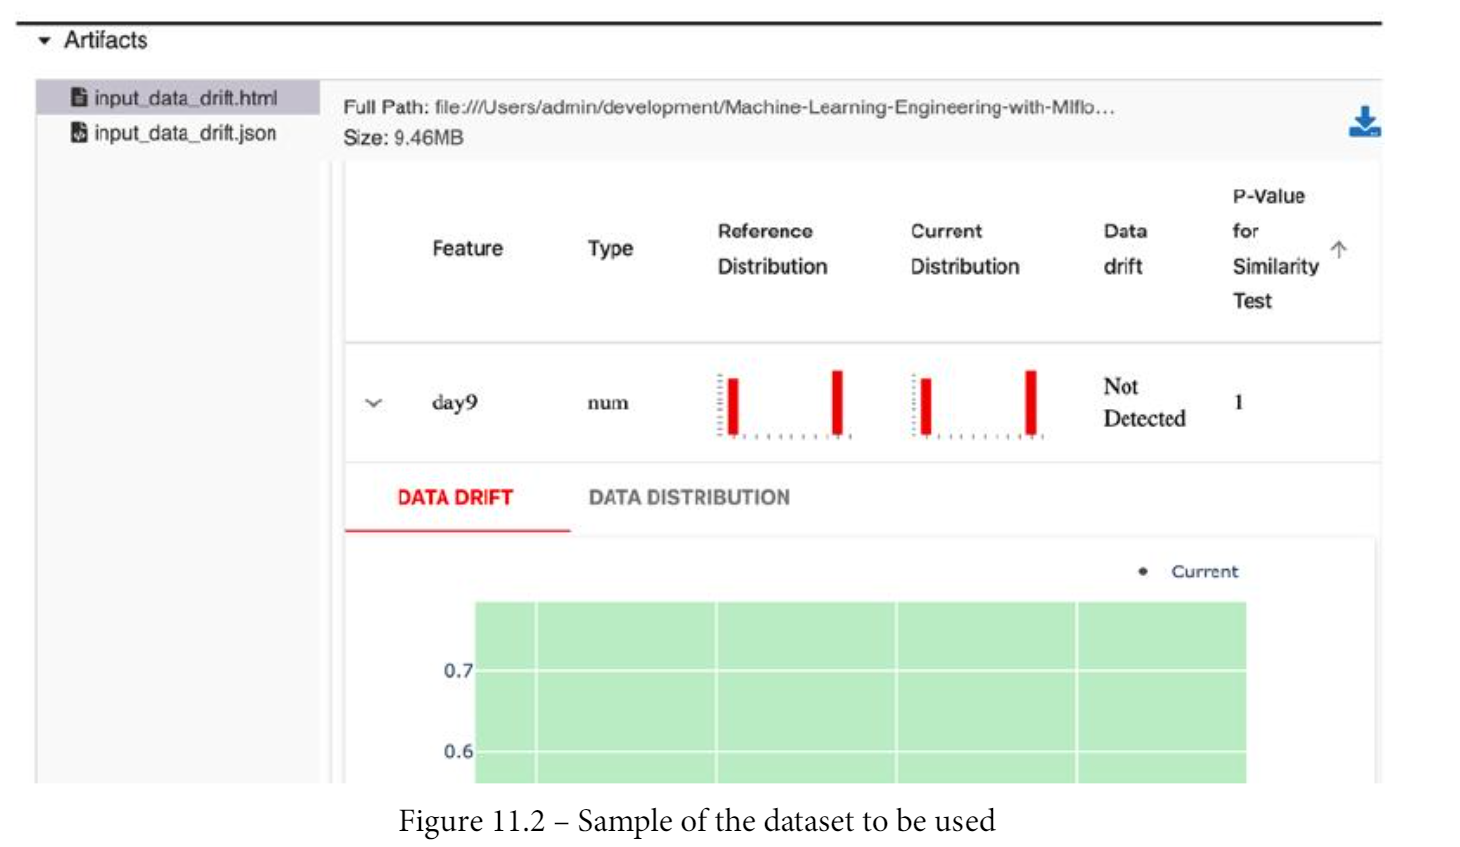

De la même manière que pour le drive de données, nous allons maintenant examiner dans la sous-section suivante le drive cible pour découvrir d'autres problèmes possibles dans notre modèle

## Surveillance de la dérive cible

Nous allons maintenant comparer la sortie notée avec la sortie d'entraînement de référence pour rechercher une dérive cible possible : 

1. Obtenez l'ensemble de données récemment noté :

In [ ]:
import pandas as pd
import numpy as np
import mlflow

from sklearn import datasets
from sklearn.model_selection import train_test_split


from evidently.dashboard import Dashboard
from evidently.tabs import NumTargetDriftTab,CatTargetDriftTab



reference_data = pd.read_csv("training_data.csv",
                                            header=None,
                                            names=[ "day{}".format(i) for i in range(0,14) ]+["target"] )


production_scored_data = pd.read_csv("scored_data.csv",
                                            header=None,
                                            names=[ "day{}".format(i) for i in range(0,14) ]+["target"] )



bcancer_data_and_target_drift = \
                          Dashboard(reference_data, production_scored_data,          
                                    tabs=[ CatTargetDriftTab])
                
                
bcancer_data_and_target_drift.save('reports/target_drift.html')



2. Exécutez la génération du rapport de dri de données et enregistrez les résultats dans MLow :

In [ ]:
EXPERIMENT_NAME="./reports_target_drift"
mlflow.set_experiment(EXPERIMENT_NAME)
with mlflow.start_run():
    model_target_drift = Dashboard(tabs=[CatTargetDriftTab])
    model_target_drift.calculate(reference_data,production_scored_data)
    model_target_drift.save(EXPERIMENT_NAME+"/target_drift.html")
    model_target_drift._save_to_json(EXPERIMENT_NAME+"/target_drift.json")
    mlflow.log_artifacts(EXPERIMENT_NAME)

3. Explorez les rapports de dri cible sur votre cible. Comme on peut le voir sur la figure 11.3, aucun chiffre statistiquement signicatif n'a été trouvé sur cette passe pour la traînée cible. Pour détecter dri, Evidently effectue des tests statistiques en utilisant la probabilité que les données proviennent d'une distribution diérente représentée par la valeur p (plus de détails à ce sujet peuvent être trouvés sur https://en.wikipedia.org/wiki/P -valeur). Il compare les résultats entre la référence et les données actuelles


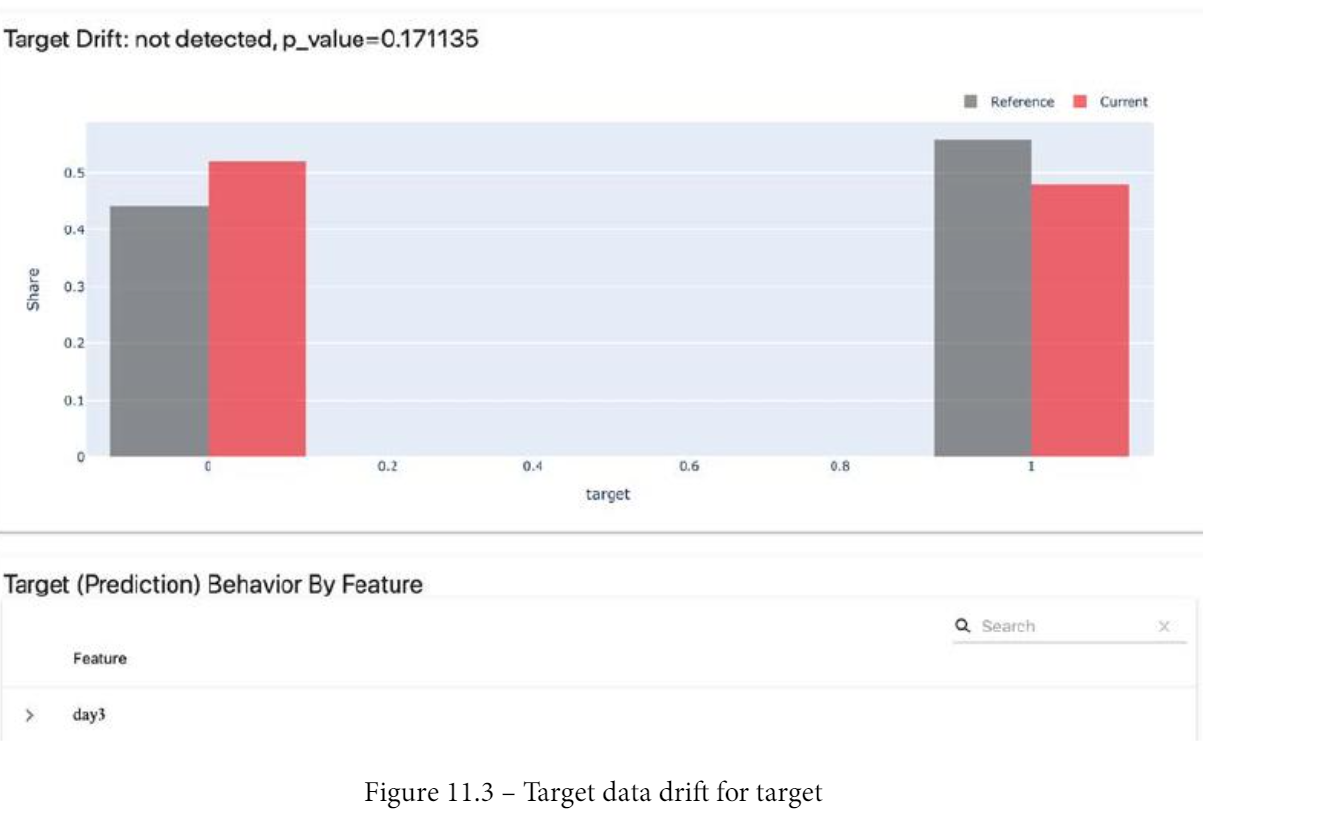

4. Comme le montre la Figure 11.4, vous pouvez explorer davantage la direction cible sur une caractéristique spécifique ; dans ce cas, un jour précédent8 spécique pour prédire le cours de l'action :

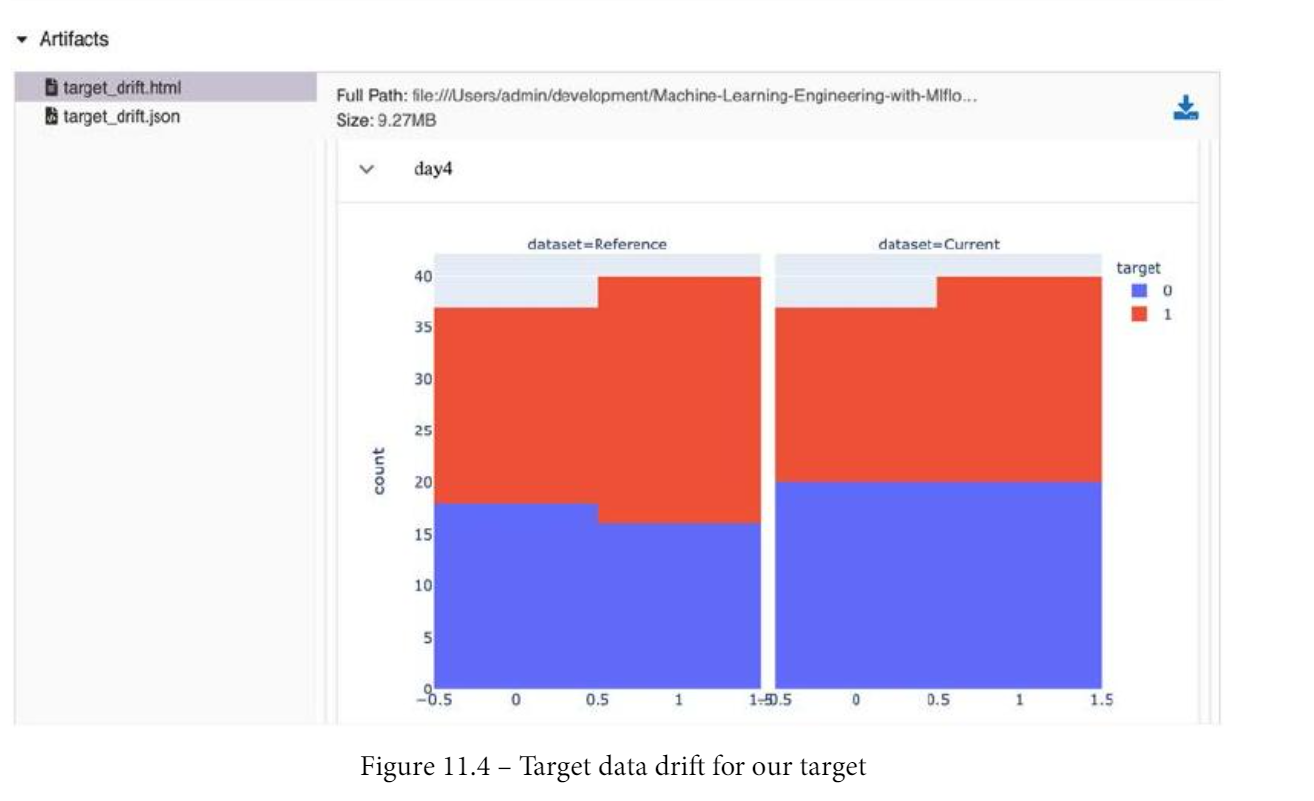

Après avoir appris à détecter la dérive dans les données d'entrée, nous allons maintenant voir comment utiliser Evidently pour surveiller la dérive dans les modèles.

## Surveillance de la dérive du modèle

La surveillance de la dérive du modèle est extrêmement importante pour s'assurer que votre modèle fonctionne toujours à son niveau de performance optimal. À partir de cette analyse, vous pouvez décider si vous souhaitez recycler votre modèle ou même en développer un nouveau à partir de zéro. Nous allons maintenant surveiller l'évolution du modèle. Pour ce faire, vous devez exécuter les étapes suivantes :

1. Importez les bibliothèques pertinentes :

In [ ]:
import xgboost as xgb
import mlflow
import pandas as pd
from evidently.tabs import ClassificationPerformanceTab
from sklearn.model_selection import train_test_split
from evidently.dashboard import Dashboard

2.  Get a reference dataset:

In [ ]:
reference_data = pd.read_csv("training_data.csv",
                                            header=None,
                                            names=[ "day{}".format(i) for i in range(0,14) ]+["target"] )

X=reference_data.iloc[:,:-1]
Y=reference_data.iloc[:,-1]

reference, production, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=4284, stratify=Y)

reference_train = xgb.DMatrix(reference,label=y_train)
dproduction= xgb.DMatrix(production)
dreference=xgb.DMatrix(reference)

3.   Train your model:

In [ ]:
mlflow.xgboost.autolog()
EXPERIMENT_NAME="reports_model_performance"
mlflow.set_experiment(EXPERIMENT_NAME)
threshold=0.5
with mlflow.start_run() as run:

    model=xgb.train(dtrain=reference_train,params={})

4.  Create a reference prediction and training predictions:

In [ ]:
    train_proba_predict = model.predict(dreference)
    test_proba_predict = model.predict(dproduction)
    test_predictions = [1. if y_cont > threshold else 0. for y_cont in test_proba_predict]
    train_predictions = [1. if y_cont > threshold else 0. for y_cont in train_proba_predict]
    reference['target'] = y_train
    reference['prediction'] = train_predictions
    production['target'] = y_test
    production['prediction'] = test_predictions

5.  Generate and attach the performance reports to your execution:

In [ ]:
    classification_performance = Dashboard( 
                       tabs=[ClassificationPerformanceTab])
    classification_performance.calculate(reference,production)

    classification_performance.save('.reports/'+EXPERIMENT_NAME+'.html')
    mlflow.log_artifact('.reports/'+EXPERIMENT_NAME+'.html')

6. Explorez votre rapport sur les mesures de performance MLflow. En examinant les rapports générés, vous pouvez vérifier sur les métriques de référence que les métriques d'exactitude, de précision, de rappel et de F1, qui sont considérées comme les métriques de référence basées sur les données d'entraînement, ont des valeurs maximales de 1. L'état actuel sur la ligne ci-dessous est nettement dégradé lorsque nous testons le sous-ensemble de données de test. Cela peut vous aider à déterminer s'il est judicieux que le modèle soit toujours en production avec la valeur F1 actuelle :

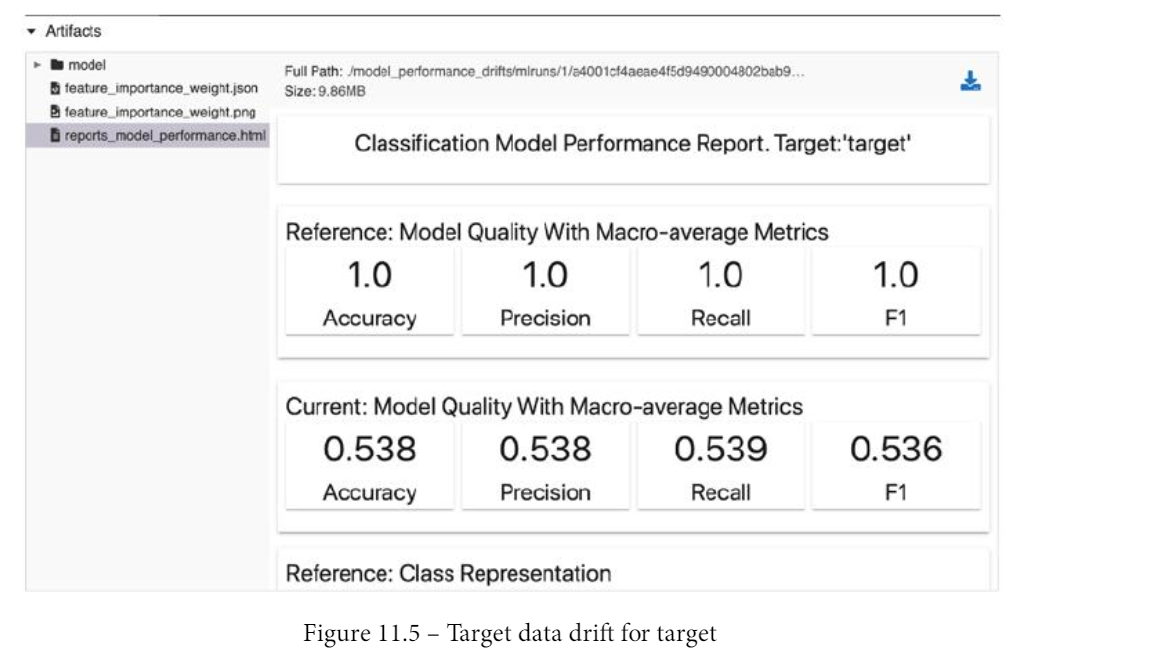

Après avoir approfondi les détails de la gestion des données, de la gestion des cibles et de la surveillance des performances du modèle, ainsi que la manière d'intégrer ces fonctionnalités à MLflow, nous allons maintenant examiner les principes de base de l'infrastructure de surveillance, y compris la surveillance et l'alerte.